# Correcting Misclassified Images Using Combined CNN with Tsetlin Machine

In [1]:
# Install required packages
!pip install tensorflow matplotlib numpy tmu scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from tmu.models.classification.vanilla_classifier import TMClassifier
from sklearn.model_selection import train_test_split

2025-03-29 21:18:00,851 - tmu.util.cuda_profiler - WARNING - Could not import pycuda: No module named 'pycuda'
2025-03-29 21:18:00,853 - tmu.clause_bank.clause_bank_cuda - ERROR - No module named 'pycuda'
Traceback (most recent call last):
  File "c:\Users\ahpuh\AppData\Local\Programs\Python\Python310\lib\site-packages\tmu\clause_bank\clause_bank_cuda.py", line 41, in <module>
    from pycuda._driver import Device, Context
ModuleNotFoundError: No module named 'pycuda'
2025-03-29 21:18:00,857 - tmu.clause_bank.clause_bank_cuda - WARNING - Could not import pycuda. This indicates that it is not installed! A possible fix is to run 'pip install pycuda'. Fallback to CPU ClauseBanks.


## 1. Load and Prepare CIFAR-10 Dataset

In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print dataset sizes
print(f"Training set: {len(x_train)} images")
print(f"Test set: {len(x_test)} images")
print(f"Total dataset: {len(x_train) + len(x_test)} images")
print(f"Split ratio (train:test): {len(x_train) / len(x_test):.1f}:1")
print(f"Training percentage: {len(x_train) / (len(x_train) + len(x_test)) * 100:.1f}%")
print(f"Test percentage: {len(x_test) / (len(x_train) + len(x_test)) * 100:.1f}%")

x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat, y_test_cat = to_categorical(y_train, 10), to_categorical(y_test, 10)

Training set: 50000 images
Test set: 10000 images
Total dataset: 60000 images
Split ratio (train:test): 5.0:1
Training percentage: 83.3%
Test percentage: 16.7%


## 2. Build and Train a Simple CNN

In [5]:
# Create a model that only goes up to the feature layer
def build_feature_extractor():
    model = models.Sequential([
        layers.Input(shape=(32, 32, 3)),  # Input layer
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu')  # Feature layer
    ])
    return model

# Create a full CNN model for classification
def build_classifier():
    model = models.Sequential([
        layers.Input(shape=(32, 32, 3)),  # Input layer
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),  # Feature layer
        layers.Dense(10, activation='softmax')  # Classification layer
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build and train the full CNN classifier
cnn_model = build_classifier()
cnn_model.fit(x_train, y_train_cat, epochs=5, batch_size=64, validation_data=(x_test, y_test_cat))

# Build the feature extractor with identical layers up to the feature layer
feature_extractor = build_feature_extractor()

# Copy weights from trained classifier to feature extractor
for i in range(len(feature_extractor.layers)):
    feature_extractor.layers[i].set_weights(cnn_model.layers[i].get_weights())



Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.3746 - loss: 1.7415 - val_accuracy: 0.5467 - val_loss: 1.2821
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5631 - loss: 1.2455 - val_accuracy: 0.5848 - val_loss: 1.1816
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6100 - loss: 1.1147 - val_accuracy: 0.6152 - val_loss: 1.1046
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6425 - loss: 1.0264 - val_accuracy: 0.6306 - val_loss: 1.0620
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6783 - loss: 0.9348 - val_accuracy: 0.6315 - val_loss: 1.0723


Extracting features...
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
x_train_tm shape: (50000, 64), dtype: uint32
y_train_tm shape: (50000,), dtype: uint32
Training Tsetlin Machine...
Epoch	Train Accuracy	Val Accuracy
----------------------------------------
 1/20	0.6182		0.5667
 2/20	0.6245		0.5709
 3/20	0.6270		0.5762
 4/20	0.6286		0.5776
 5/20	0.6322		0.5772
 6/20	0.6280		0.5763
 7/20	0.6322		0.5788
 8/20	0.6302		0.5767
 9/20	0.6314		0.5783
10/20	0.6318		0.5776
11/20	0.6303		0.5742
12/20	0.6328		0.5772
13/20	0.6313		0.5765
14/20	0.6310		0.5752
15/20	0.6325		0.5728
16/20	0.6320		0.5803
17/20	0.6305		0.5764
18/20	0.6312		0.5765
19/20	0.6326		0.5775
20/20	0.6323		0.5771


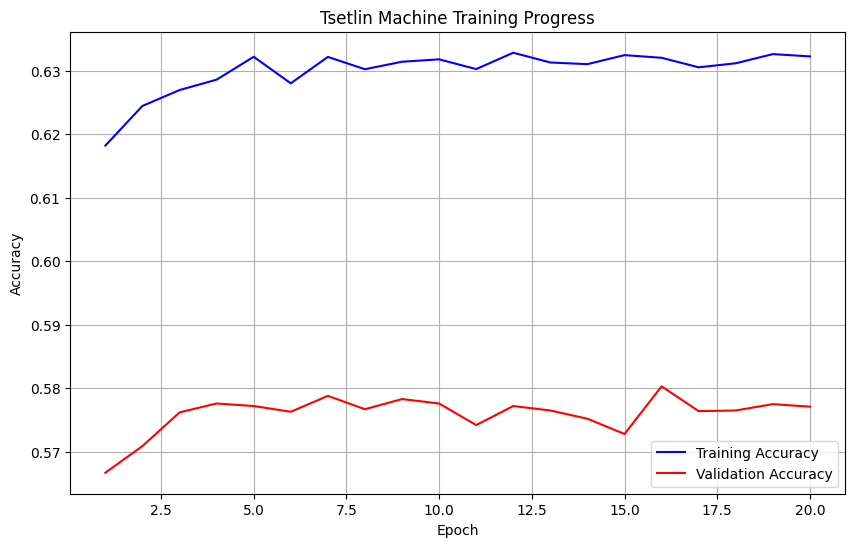


Final Results:
Training accuracy: 0.6323
Validation accuracy: 0.5771
Error during training: name 'confusion_matrix' is not defined

Data information:
x_train_tm min: 0, max: 1
y_train_tm values: [0 1 2 3 4 5 6 7 8 9]

Trying alternative configuration...
Alternative configuration results:
Training accuracy: 0.6036
Validation accuracy: 0.5614


<Figure size 800x600 with 0 Axes>

In [9]:
def binarize_features(features):
    # Calculate threshold for each feature dimension
    thresholds = np.mean(features, axis=0)
    # Binarize features
    binary_features = (features > thresholds).astype(np.uint32)
    return binary_features

# After extracting features with the feature_extractor
print("Extracting features...")
x_train_features = feature_extractor.predict(x_train)
x_test_features = feature_extractor.predict(x_test)

# Binarize features for Tsetlin Machine
x_train_tm = binarize_features(x_train_features)
x_test_tm = binarize_features(x_test_features)

# Convert labels to uint32 as required by TMU
y_train_tm = np.argmax(y_train_cat, axis=1).astype(np.uint32)
y_test_tm = np.argmax(y_test_cat, axis=1).astype(np.uint32)

# Print shapes and dtypes to verify
print(f"x_train_tm shape: {x_train_tm.shape}, dtype: {x_train_tm.dtype}")
print(f"y_train_tm shape: {y_train_tm.shape}, dtype: {y_train_tm.dtype}")

# Create a Tsetlin Machine with improved hyperparameters
from tmu.models.classification.vanilla_classifier import TMClassifier

tm = TMClassifier(
    number_of_clauses=200,  # Increased for better capacity
    T=15,                   # Adjusted for balance
    s=5.0,                  # Adjusted specificity
    boost_true_positive_feedback=1,
    weighted_clauses=False
)

# Train the model with per-epoch monitoring
print("Training Tsetlin Machine...")
num_epochs = 20
train_accuracies = []
val_accuracies = []

print("Epoch\tTrain Accuracy\tVal Accuracy")
print("-" * 40)

try:
    for epoch in range(num_epochs):
        # Train for one epoch
        tm.fit(x_train_tm, y_train_tm, epochs=1)
        
        # Calculate training accuracy
        y_train_pred = tm.predict(x_train_tm)
        train_acc = accuracy_score(y_train_tm, y_train_pred)
        train_accuracies.append(train_acc)
        
        # Calculate validation accuracy
        y_test_pred = tm.predict(x_test_tm)
        val_acc = accuracy_score(y_test_tm, y_test_pred)
        val_accuracies.append(val_acc)
        
        # Print progress
        print(f"{epoch+1:2d}/{num_epochs}\t{train_acc:.4f}\t\t{val_acc:.4f}")
    
    # Plot training progress
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs+1), train_accuracies, 'b-', label='Training Accuracy')
    plt.plot(range(1, num_epochs+1), val_accuracies, 'r-', label='Validation Accuracy')
    plt.title('Tsetlin Machine Training Progress')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Final evaluation
    print("\nFinal Results:")
    print(f"Training accuracy: {train_accuracies[-1]:.4f}")
    print(f"Validation accuracy: {val_accuracies[-1]:.4f}")
    
    # Confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test_tm, y_test_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
except Exception as e:
    print(f"Error during training: {str(e)}")
    
    # Try to debug
    print(f"\nData information:")
    print(f"x_train_tm min: {x_train_tm.min()}, max: {x_train_tm.max()}")
    print(f"y_train_tm values: {np.unique(y_train_tm)}")
    
    # Try different TMClassifier parameters if needed
    print("\nTrying alternative configuration...")
    try:
        alt_tm = TMClassifier(
            number_of_clauses=50,
            T=10, 
            s=3.0,
            boost_true_positive_feedback=0
        )
        
        # Train for just one epoch to test
        alt_tm.fit(x_train_tm, y_train_tm, epochs=1)
        
        # Check if it works
        alt_train_acc = accuracy_score(y_train_tm, alt_tm.predict(x_train_tm))
        alt_val_acc = accuracy_score(y_test_tm, alt_tm.predict(x_test_tm))
        
        print(f"Alternative configuration results:")
        print(f"Training accuracy: {alt_train_acc:.4f}")
        print(f"Validation accuracy: {alt_val_acc:.4f}")
        
    except Exception as e2:
        print(f"Alternative configuration failed: {str(e2)}")

In the context of your CNN+Tsetlin combined model, the threshold refers to the confidence level below which predictions from the CNN are considered unreliable and are replaced by predictions from the Tsetlin Machine.

How the Threshold Works:

1.Confidence Measurement: When the CNN makes a prediction, it outputs probability scores for each class. The highest probability is considered the model's confidence in its prediction.

2.Decision Rule:

If confidence ≥ threshold: Use the CNN's prediction

If confidence < threshold: Use the Tsetlin Machine's prediction instead

3.Threshold Selection: The optimal threshold value is typically determined empirically by testing different values (e.g., 0.5, 0.6, 0.7, 0.8, 0.9) and selecting the one that yields the best performance.

Impact of Different Threshold Values:

1.Lower threshold (e.g., 0.5):

More conservative approach

Only very low-confidence CNN predictions will be replaced

Fewer samples will be passed to the Tsetlin Machine

The combined model will behave more like the CNN alone

2.Higher threshold (e.g., 0.9):

More aggressive approach

Even moderate-confidence CNN predictions will be replaced


More samples will be passed to the Tsetlin Machine

The combined model will rely more heavily on the Tsetlin Machine


Setting the right threshold is a balancing act - you want to replace inaccurate CNN predictions while keeping accurate ones. The optimal threshold depends on:

The relative strengths of each model

The dataset characteristics

The distribution of the CNN's confidence scores

In [10]:
# Evaluate the CNN model on the test set
y_test_true = np.argmax(y_test_cat, axis=1)
y_cnn_pred = np.argmax(cnn_model.predict(x_test), axis=1)
cnn_accuracy = accuracy_score(y_test_true, y_cnn_pred)
print(f"CNN Test Accuracy: {cnn_accuracy:.4f}")

# Evaluate the Tsetlin Machine on the test set using extracted features
tm_accuracy = accuracy_score(y_test_tm, y_pred_tm)
print(f"Tsetlin Machine Test Accuracy: {tm_accuracy:.4f}")

# Implement the combined model prediction function
def combined_model_prediction(x_samples, cnn_model, feature_extractor, tm_model, threshold=0.7):
    """
    Create combined predictions using CNN and Tsetlin Machine.
    Use Tsetlin Machine for samples where CNN has low confidence.
    """
    # Get CNN predictions and confidences
    cnn_preds_prob = cnn_model.predict(x_samples)
    cnn_confidences = np.max(cnn_preds_prob, axis=1)
    cnn_classes = np.argmax(cnn_preds_prob, axis=1)
    
    # Find samples where CNN has low confidence
    low_confidence_indices = np.where(cnn_confidences < threshold)[0]
    
    # Create final predictions array (start with CNN predictions)
    final_preds = cnn_classes.copy()
    
    # If there are low confidence predictions, use Tsetlin Machine for those
    if len(low_confidence_indices) > 0:
        # Extract features for low confidence samples
        x_low_confidence_features = feature_extractor.predict(x_samples[low_confidence_indices])
        x_low_confidence_tm = x_low_confidence_features.astype(np.uint32)
        
        # Get Tsetlin Machine predictions for low confidence samples
        tm_preds = tm_model.predict(x_low_confidence_tm)
        
        # Replace low confidence predictions with Tsetlin Machine predictions
        final_preds[low_confidence_indices] = tm_preds
    
    return final_preds

# Test the combined model at different threshold levels
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]
results = []

for threshold in thresholds:
    # Get combined predictions using the current threshold
    combined_preds = combined_model_prediction(x_test, cnn_model, feature_extractor, tm, threshold)
    combined_accuracy = accuracy_score(y_test_true, combined_preds)
    
    # Calculate percentage of samples sent to Tsetlin Machine
    cnn_confidences = np.max(cnn_model.predict(x_test), axis=1)
    tm_usage_percent = np.mean(cnn_confidences < threshold) * 100
    
    results.append({
        'threshold': threshold,
        'accuracy': combined_accuracy,
        'tm_usage_percent': tm_usage_percent
    })
    
    print(f"Threshold {threshold}: Combined Accuracy = {combined_accuracy:.4f}, TM Usage = {tm_usage_percent:.1f}%")

# Find best threshold based on accuracy
best_result = max(results, key=lambda x: x['accuracy'])
print(f"\nBest threshold: {best_result['threshold']} with accuracy {best_result['accuracy']:.4f}")
print(f"Improvement over CNN: {(best_result['accuracy'] - cnn_accuracy) * 100:.2f} percentage points")

# Compare the models
print("\nModel Comparison:")
print(f"CNN Accuracy: {cnn_accuracy:.4f}")
print(f"Tsetlin Machine Accuracy: {tm_accuracy:.4f}")
print(f"CNN+Tsetlin Combined Accuracy: {best_result['accuracy']:.4f}")



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
CNN Test Accuracy: 0.6315
Tsetlin Machine Test Accuracy: 0.2222
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Threshold 0.5: Combined Accuracy = 0.5533, TM Usage = 28.5%
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Threshold 0.6: Combined Accuracy = 0.4892, TM Usage = 43.4%
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Threshold 0.7: Combined Accuracy = 0.4224, TM Usage = 55.9%
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Threshold 0.8: Combined Accuracy = 0.3545, TM Usage = 66.9%
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Threshold 0.9: Combined Accuracy = 0.2624,

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Number of misclassifications corrected by combined model: 573
Number of misclassifications not corrected by combined model: 3169
Total number of CNN misclassifications: 3742
Correction rate: 15.31%


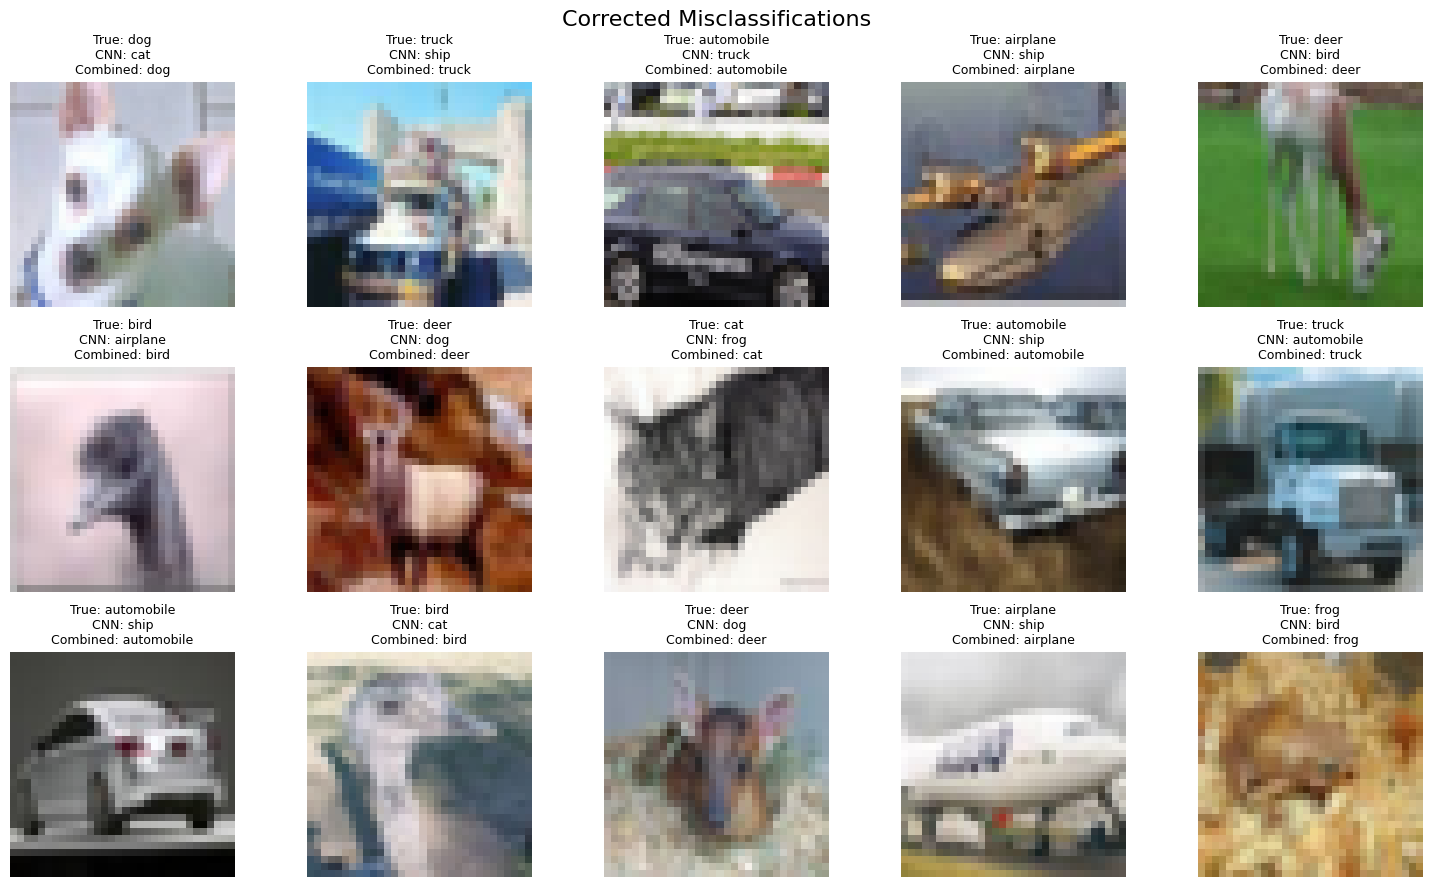

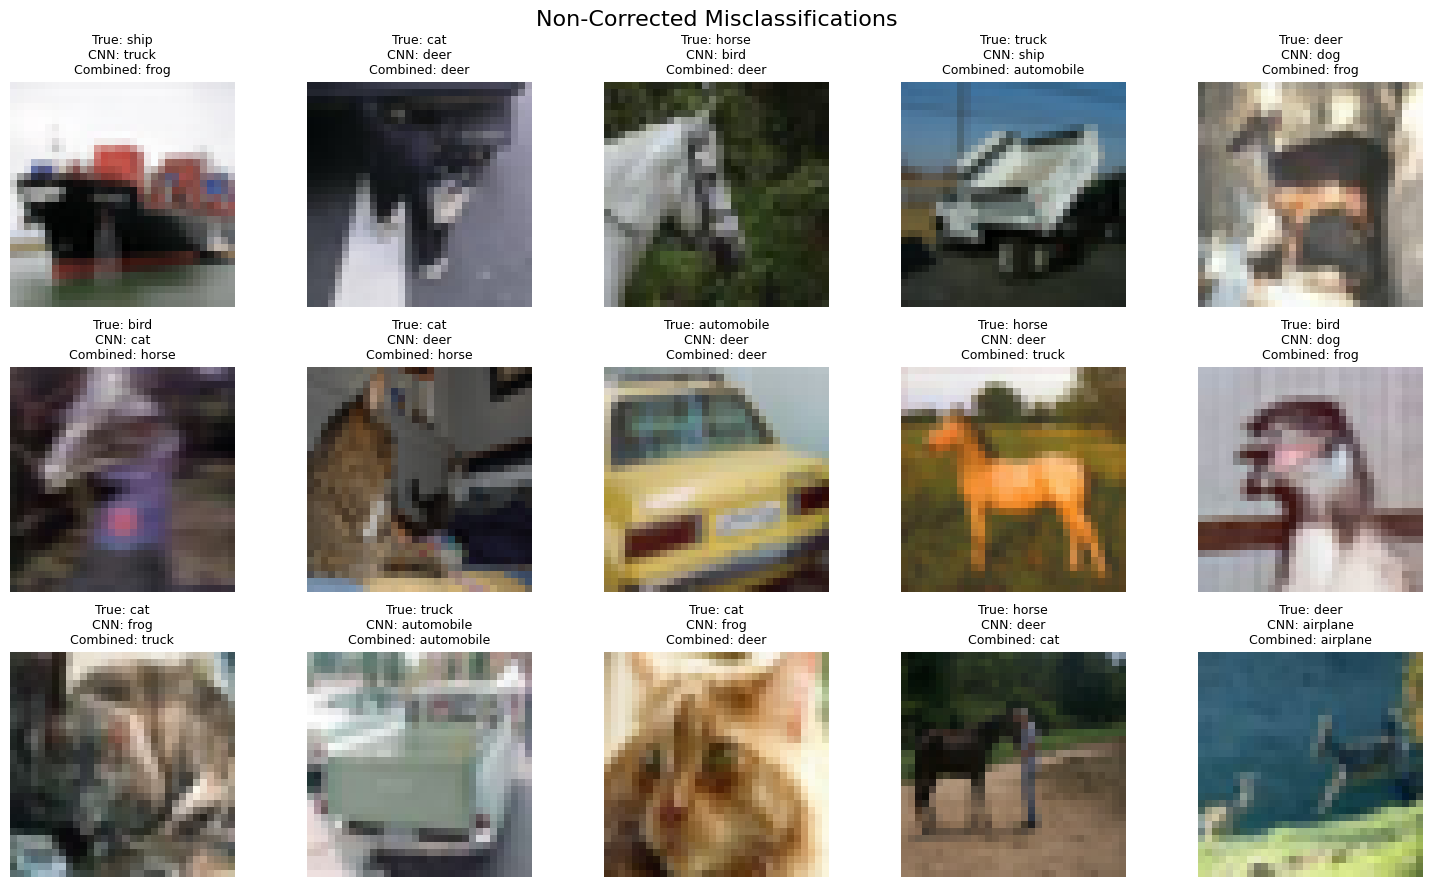

In [35]:
# Show misclassified images with corrections
def show_misclassifications(x_samples, y_true, cnn_model, combined_preds, num_images=15):
    """
    Display both corrected and non-corrected misclassifications.
    """
    # Get CNN predictions
    cnn_preds = np.argmax(cnn_model.predict(x_samples), axis=1)
    y_true_flat = np.argmax(y_true, axis=1) if len(y_true.shape) > 1 else y_true
    
    # Find indices for corrected misclassifications
    # 1. CNN prediction is wrong
    # 2. Combined prediction is right
    corrected_indices = np.where((cnn_preds != y_true_flat) & (combined_preds == y_true_flat))[0]
    
    # Find indices for non-corrected misclassifications
    # 1. CNN prediction is wrong
    # 2. Combined prediction is also wrong
    not_corrected_indices = np.where((cnn_preds != y_true_flat) & (combined_preds != y_true_flat))[0]
    
    print(f"Number of misclassifications corrected by combined model: {len(corrected_indices)}")
    print(f"Number of misclassifications not corrected by combined model: {len(not_corrected_indices)}")
    print(f"Total number of CNN misclassifications: {np.sum(cnn_preds != y_true_flat)}")
    print(f"Correction rate: {len(corrected_indices) / max(1, np.sum(cnn_preds != y_true_flat)):.2%}")
    
    # CIFAR-10 class names for better readability
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    
    # Function to plot a set of images
    def plot_images(indices, title):
        if len(indices) == 0:
            print(f"No {title} images found.")
            return
        
        # Randomly select up to the specified number of images
        if len(indices) > num_images:
            selected_indices = np.random.choice(indices, num_images, replace=False)
        else:
            selected_indices = indices
        
        # Plot images (5 images per row)
        num_rows = (len(selected_indices) + 4) // 5  # Calculate number of rows needed
        fig, axes = plt.subplots(num_rows, 5, figsize=(15, 3 * num_rows))
        fig.suptitle(title, fontsize=16)
        axes = axes.flatten() if num_rows > 1 else [axes]  # Flatten axes for easy iteration
        
        for i, idx in enumerate(selected_indices):
            if i < len(axes):
                axes[i].imshow(x_samples[idx])
                true_class = y_true_flat[idx]
                cnn_class = cnn_preds[idx]
                combined_class = combined_preds[idx]
                
                title = f"True: {class_names[true_class]}\n"
                title += f"CNN: {class_names[cnn_class]}\n"
                title += f"Combined: {class_names[combined_class]}"
                
                axes[i].set_title(title, fontsize=9)
                axes[i].axis("off")
        
        # Hide any unused subplots
        for i in range(len(selected_indices), len(axes)):
            axes[i].axis("off")
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.9)  # Adjust for the suptitle
        plt.show()
    
    # Plot corrected misclassifications
    plot_images(corrected_indices, "Corrected Misclassifications")
    
    # Plot non-corrected misclassifications
    plot_images(not_corrected_indices, "Non-Corrected Misclassifications")

# Show both corrected and non-corrected misclassifications
show_misclassifications(x_test, y_test_cat, cnn_model, combined_preds, num_images=15)

This notebook demonstrates how a combined model of Convolutional Neural Network (CNN) and Tsetlin Machine can correct misclassifications made by the CNN alone. The approach works by:

1.Training a CNN on the CIFAR-10 dataset

2.Extracting features from the CNN's intermediate layer (64 features)

3.Training a Tsetlin Machine on those features

4.Creating a combined model that uses the Tsetlin Machine for low-confidence CNN predictions

5.Visualizing and analyzing which misclassifications were successfully corrected

The implementation shows both:

1.Successfully corrected misclassifications (where the combined model corrects errors made by the CNN)

2.Non-corrected misclassifications (where both models fail)

This approach leverages the complementary strengths of both models - CNN's powerful feature extraction capabilities and Tsetlin Machine's interpretable, rule-based classification - to improve overall classification accuracy.